___
# <font color=#EEAA11> HW #5: Visualization </font>



### Full Name: **Pham Dinh Gia Huy**

____

## <font color=#00BBFF> Problem #1 (10 pts) </font>

In this problem you are going to explore making a parallel plot using Pandas. In general, the plotting in Pandas is not the best; but, sometimes you just want to do quick EDA only with Pandas without dealing with other libraries.

🤓 Follow these steps:
* pick a dataset and put it into a dataframe,
* make a parallel plot using Pandas's `parallel_coordinates`,
* make at least two versions by choosing how you color the lines, (e.g., coloring by a categorical variable),
* think about what conclusions you would draw about your dataset from these explorations,
* scale the data using a z-score, and remake the parallel plot,
* does the scaling aid in the visualization process? if so, how? if not, why not? (the answer will depend on the dataset you choose! compare two datasets, and not penguins)

____

**If** you want some helper code, look the code below. **If** you use it, comment every line and ensure that it is PEP-8 compliant, and adapt it to your choice of dataset. (You might see if you can use the dataset you plan to use for your project, although it may not make sense in this context.)

In [64]:
import seaborn as sns
import pandas as pd

taxis = sns.load_dataset("taxis")
print(taxis)
taxis.describe()


                  pickup             dropoff  passengers  distance  fare  \
0    2019-03-23 20:21:09 2019-03-23 20:27:24           1      1.60   7.0   
1    2019-03-04 16:11:55 2019-03-04 16:19:00           1      0.79   5.0   
2    2019-03-27 17:53:01 2019-03-27 18:00:25           1      1.37   7.5   
3    2019-03-10 01:23:59 2019-03-10 01:49:51           1      7.70  27.0   
4    2019-03-30 13:27:42 2019-03-30 13:37:14           3      2.16   9.0   
...                  ...                 ...         ...       ...   ...   
6428 2019-03-31 09:51:53 2019-03-31 09:55:27           1      0.75   4.5   
6429 2019-03-31 17:38:00 2019-03-31 18:34:23           1     18.74  58.0   
6430 2019-03-23 22:55:18 2019-03-23 23:14:25           1      4.14  16.0   
6431 2019-03-04 10:09:25 2019-03-04 10:14:29           1      1.12   6.0   
6432 2019-03-13 19:31:22 2019-03-13 19:48:02           1      3.85  15.0   

       tip  tolls  total   color      payment            pickup_zone  \
0     2.15    0

,pickup,dropoff,passengers,distance,fare,tip,tolls,total
count,6433,6433,6433.000000,6433.000000,6433.000000,6433.00000,6433.000000,6433.000000
mean,2019-03-16 08:31:28.514223616,2019-03-16 08:45:49.491217408,1.539251,3.024617,13.091073,1.97922,0.325273,18.517794
min,2019-02-28 23:29:03,2019-02-28 23:32:35,0.000000,0.000000,1.000000,0.00000,0.000000,1.300000
25%,2019-03-08 15:50:34,2019-03-08 16:12:51,1.000000,0.980000,6.500000,0.00000,0.000000,10.800000
50%,2019-03-15 21:46:58,2019-03-15 22:06:44,1.000000,1.640000,9.500000,1.70000,0.000000,14.160000
75%,2019-03-23 17:41:38,2019-03-23 17:51:56,2.000000,3.210000,15.000000,2.80000,0.000000,20.300000
max,2019-03-31 23:43:45,2019-04-01 00:13:58,6.000000,36.700000,150.000000,33.20000,24.020000,174.820000
std,NaN,NaN,1.203768,3.827867,11.551804,2.44856,1.415267,13.815570


<Axes: >

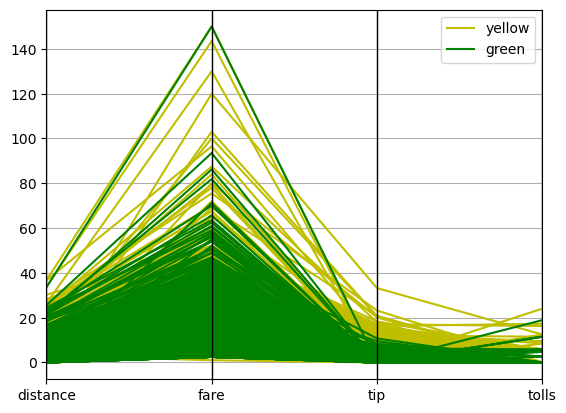

In [46]:
pd.plotting.parallel_coordinates(taxis, class_column ='color', cols=['distance', 'fare', 'tip', 'tolls'], color=('y', 'g'))

<Axes: >

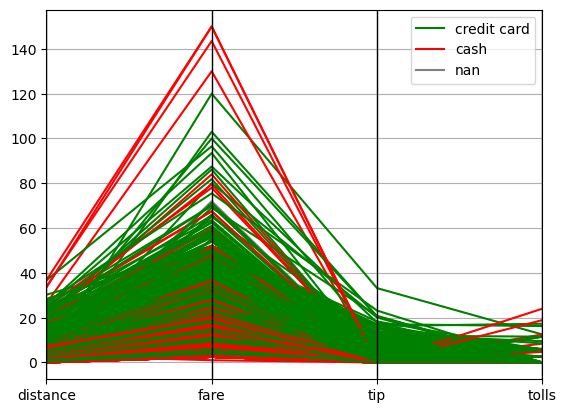

In [45]:
pd.plotting.parallel_coordinates(taxis, class_column ='payment', cols=['distance', 'fare', 'tip', 'tolls'], color=('g', 'r', 'gray'))

📝 
* Interestingly, some of the Yellow taxis passengers seem to pay higher fare and was charged higher toll for the same travel distance but they still tip more!
* Some of the highest payment across all fee are from cash payment! 
* However since there are so many datapoint in this dataset, all the categories seem to lay on top of each other and hinder visuallization a little like in the first plot, there should be several parallel line for the yellow taxis record there but they was hidden by the green taxis record.


<Axes: >

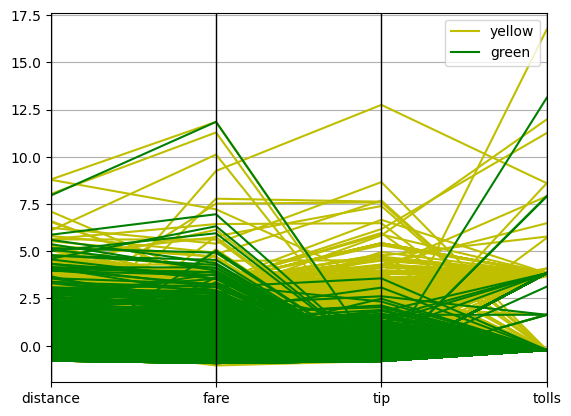

In [57]:
from scipy.stats import zscore

taxis_normed = taxis[['distance', 'fare', 'tip', 'tolls']].apply(zscore)
taxis_normed[['color', 'payment']] = taxis[['color', 'payment']] 
pd.plotting.parallel_coordinates(taxis_normed, class_column ='color', cols=['distance', 'fare', 'tip', 'tolls'], color=('y', 'g'))

<Axes: >

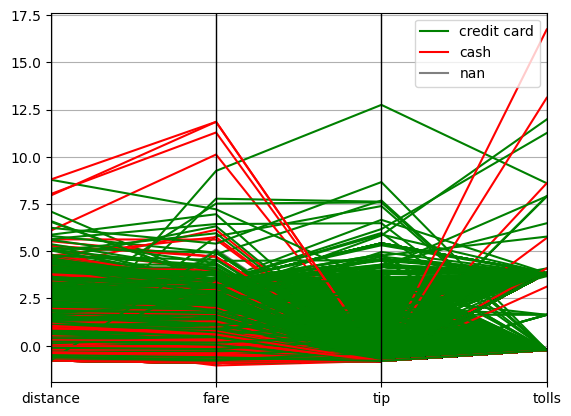

In [58]:
pd.plotting.parallel_coordinates(taxis_normed, class_column ='payment', cols=['distance', 'fare', 'tip', 'tolls'], color=('g', 'r', 'gray'))

📝Yes the scaling do aid with visualization, before the z-score is applied the fare attributes has way higher base value than tip and tolls which tempted me to underestiment the spread of these attributes apart from a few outliers. Bring them all up a shared scaled help us to put everything under one baseline and we can inspect the variation or rank of all the catergories we want to check.

In [ ]:
import seaborn as sns
import pandas as pd
from scipy.stats import zscore
import numpy as np
import matplotlib.pyplot as plt

f, (a1,a2) = plt.subplots(ncols=2, nrows=1, figsize=(20,5))

# choose the penguin dataset
df_p = sns.load_dataset("penguins").dropna()

pd.plotting.parallel_coordinates(df_p[["species", "bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]], "species", ax=a1)

# another option
#pd.plotting.parallel_coordinates(df_p[["sex", "bill_length_mm",	"bill_depth_mm",	"flipper_length_mm",	"body_mass_g"]], "sex",ax=a1)

numeric_cols = df_p.select_dtypes(include=[np.number]).columns

df_p_s = df_p[numeric_cols].apply(zscore)

df_p_s["species"] = df_p["species"]
pd.plotting.parallel_coordinates(df_p_s, "species", ax=a2)
plt.title("with zscore")

#df_p_s["sex"] = df_p["sex"]
#pd.plotting.parallel_coordinates(df_p_s[["sex", "bill_length_mm",	"bill_depth_mm",	"flipper_length_mm",	"body_mass_g"]], "sex",ax=a2)


____

## <font color=#00BBFF>  Problem #2 (10) </font>

Next, we are going to compare the previous result with HiPlot, which is a library specifically designed for exploring high-dimensional datasets. It tends to look better, have more features and _-- most importantly for EDA --_ it is interactive.

🤓 Follow these steps:
* install [HiPlot](https://github.com/facebookresearch/hiplot) on your machine,
* read the documentation to understand how to use HiPlot with a dataframe,
* open HiPlot in your notebook with a dataset you explored in the previous problem,
* play with HiPlot so that you know how to use its most important features:
  * how do you select a portion of one of the vertical axes?
  * how do you slide the range box vertically to select different portions of the data?
  * can you select (with the gray boxes) different ranges on different vertical axes?
  * how do you reorder the vertical axes?
  * what use the dataframe below the plot? what happens if you mouse over the rows?
  * for your dataset, set the order of the vertical axes to correspond to a narrative/story, and describe that in a markdown cell - image you are using such a plot for your project and you want to tell a specific story.

If you find HiPlot useful, consider using it in your project. [It works with streamlit.](https://facebookresearch.github.io/hiplot/tuto_streamlit.html)

In [61]:
!pip install -U hiplot

     ---------------------------------------- 0.0/863.2 kB ? eta -:--:--
     ---------------------------------------- 10.2/863.2 kB ? eta -:--:--
     - ----------------------------------- 30.7/863.2 kB 330.3 kB/s eta 0:00:03
     --- --------------------------------- 71.7/863.2 kB 491.5 kB/s eta 0:00:02
     --------------- ---------------------- 358.4/863.2 kB 2.2 MB/s eta 0:00:01
     -------------------------------------- 863.2/863.2 kB 4.2 MB/s eta 0:00:00
  Obtaining dependency information for flask from https://files.pythonhosted.org/packages/36/42/015c23096649b908c809c69388a805a571a3bea44362fe87e33fc3afa01f/flask-3.0.0-py3-none-any.whl.metadata
  Obtaining dependency information for flask-compress from https://files.pythonhosted.org/packages/3f/d2/23fd656d38d4c896fa14371990b9978722c48a30d0edcf6b5f7054775a07/Flask_Compress-1.14-py3-none-any.whl.metadata
  Obtaining dependency information for Werkzeug>=3.0.0 from https://files.pythonhosted.org/packages/b6/a5/54b01f663d60d5334f6c

In [62]:
#!pip install -U -qqq hiplot # needed for Google colab
import hiplot as hip
print(f"HiPlot=={hip.__version__}")

HiPlot==0.1.33


In [72]:
taxis_exp = hip.Experiment.from_dataframe(taxis_normed).display()

<IPython.core.display.Javascript object>

📝
* I can click on a value or drag vertically across a range of values along an axis to select/slice a subset of the data
* I can then slide that slection box along the axis to reveals all records with that data filter and I can even extend the filtering box.
* Yes I can create a different selection box for each of the vertical axes and freely custormize the value range size for said boxes.
* I can drag the top label of the axes left and right to reorder it however I want
* The dataframe below returns all records from the original dataframe after applying my data selections box along the axes. When I mouse over the row, the line in the plot for that row values is highlighted by being thicken and the rest of the lines are faded.
* For my taxis datasets, I want to examine the characteristic of tips with respect to the type of taxis, payment method, distance traveled, the fare and the toll. Therefore I orgranized them as such order with tip being last to verify if the intuition still holds (my assumption before EDA is that the longer the distance, the higher the fare and the passengers are more likely to tip since taxis usage for long distance travel may be for planned ahead events or appoinments and there is more on-the-road time for the taxi drivers and the passengers to have a friendly conversation.). This turn out to be somewhat true for when I drag the selection box across the tip axis, most of these high tipping entries are from the middle region of the distance and the lower tipping section comes with shorter distance too, the distance-to-fare relationship seem to return a direct correlation too which makes sense, and the yellow taxis passengers do tip much more often than the green ones!

____

## <font color=#00BBFF>  Problem #3 (30) </font>

It is time to start working on your project!

And, it is time to pay attention to the calendar! Your projects presentations will be the week of Oct. 16, which is only two weeks away. The following week is Fall Break. The next week, the week I am away, we will start diving more into the mathematics of data science.

Hopefully the HWs have prepared you for your project. Here is the schedule:
* just a reminder: I am out of town the week of October 30-November 3, but you'll have a guest instructor on probabilty and statistics; the week will be normal otherwise,
* the next week (October 23 and 24) is Fall Break - we don't meet on Monday of that week,
* your projects are due at the end of that week: in D2L by midnight on Friday, October 27th,
* during the week of Oct. 16, you will present your projects to the other members of your class; the procedure will be:
  * the presentations will happen on Wednesday, October 18th. the order of presentations will be random, so you might be presenting first on that day (be ready and arrive to the class on time! no excuses! 😉),
  * for the presentations, we are going with 12 groups of 4 and 5, which will be announced by Mahyar on the day of presentation,
  * during the presentations, you will listen to some of the presentations and interact (e.g., ask questions) with the person speaking,
  * you will complete a report of the speakers that you listened to and turn that in (to D2L as a pdf file).

So that you have a full, restful Fall Break, there will be no homework that week; and, your midterm project will have been completed the prior week.

Here are the requirements for your project. Note that these requirements may not apply to each student perfectly, because you all have some flexibility in how you design your project. If there are any special issues with your project (e.g., the data is proprietary), please let me know so that we can work with your situation.
* your project will be a streamlit app with two levels of interactivity:
  * in streamlit (e.g., through sliders, dropdowns, etc.),
  * in the visualizations themselves (e.g., using Altair or HiPlot),
  * you must have a goal, a message, a story -- there should be a point to what you are doing,
  * the app should contain any necessary text that aids the user to understand and explore your story,
  * the app should be deployable from your code at Github, and your streamlit link should be sent to Mahyar by Wed before class (do not send the link for the Github repository).

  A good example [is here](https://caron14-streamlit-linearregression-boston-house-prices-m9mvyd.streamlitapp.com) - try to be at least this complete in your app.

  As always, please contact us, or use Slack, with any issues that arise!

  🤓 For this HW, you are going to write an essay that is 500 to 1000 words. Use the [best markdown practices](https://www.markdownguide.org/cheat-sheet/), and put everything in a cell below. (You can use one plot, but no more.) What you will write is a proposal for your project. Include this in your proposal:
  1. What is the goal, what is the point? What is the "big-picture" question you are trying to answer? Who cares? Why do they care?
  2. Discuss which datasets you have looked at toward this goal. Which ones did you reject and why? Which dataset did you finally choose?
  3. Describe the dataset. What is in it? Where did it come from? Are there issues, such as missingness? If so, what type (e.g., MNAR)?
  4. What preliminary studies have you done? Do they look promising?
  5. What will your web app do? How will this be useful to people?
  6. What visualization tools do you plan on using? Why did you choose these? How will they serve the goal you outlined in step 1?
  7. Summarize with why you think this is a project worthy of completing.

  In your writing, use the best rules of English grammar, punctuation and formatting. Be sure you edit the proposal a few times before submitting it. It should be very clear, easy to read and convincing.

  Here is the logic I want you to have. The goal of the project is to present your data to someone else you don't know and who does not know very much about data science. You could imagine a scenario in which you work at a large company and are the data scientist. You are asked to design and build a web app for a mostly non-technical manager with the goal that they engage with the data as a "dashboard", perhaps as a way to report to them on what your team has done and why it is interesting an important. Thus, it is important that you understand the narrative that goes with your data, choose the best visualization to display your ideas, and layout the app in a way that is logical for a user you have never met.
  



## 🍴Exploring Food Nutritional Content for a Healthier Lifestyle 

🎯The food industry with the help of modern science and technology has bombarded us with various food options. It is increasingly harder to resist highly processed food which is deliberately engineered to achieve the perfect bliss point in flavor, convenience and shelf-stability. However, these types of food are often full of artificial ingredients, contain too much sugar, sodium and fat to make them addicting while lacking in nutritional value and worst of all, they impose the underlying risks of cancer and several other serious health problems. Understanding the nutritional content of these choices is essential for making informed decisions about what to eat. The goal of this project is to create a web application that leverages a dataset called "The Nutritional Content of Food" to help all of us make healthier dietary choices by providing easy access to essential nutritional information. 

🏋️‍♂️You may think "Hey, I am not a gym rat and I would rather die a couple of years earlier and savor my favorite dishes than survive on the miserable combination of veggies and chicken breast." Completely understandable! But this project intends to equip you with an informative and user-friendly tool to make healthier food decisions and you will soon learn that there are several options from decent to good to superb that you can choose from, the point is to tell you why the bad food is bad and the good food is great in terms of nutritional contents so that you can optimize your plate based on individuals' need.

📖Before choosing this "The Nutritional Content of Food" dataset, I explored some other options related to nutrition and food content but some were too limited in scope, while others lacked the necessary comprehensiveness or accuracy. There was a particularly comprehensive and up-to-date dataset called "CANADIAN NUTRIENT FILE COMPILATION OF CANADIAN FOOD COMPOSITION DATA" but the way they organize this dataset is as a database which would take me an enormous amount of time to look up, retrieve and append the necessary attributes for my purpose. That is why I settled with "The Nutritional Content of Food" dataset which is relatively clean, pertains sufficient nutritional information and fits in well with the project goal. The dataset comprises information on nearly 9000 food items, with each entry containing essential nutritional attributes. It includes data on macronutrients, vitamins, minerals, and other key nutritional components like calories, protein, carbohydrates, sugar, sodium and cholesterol. 

💻The web app I plan to develop will have the following features:
* Search and Filter: Users can search for specific food items or filter them based on nutritional criteria, such as calories, protein, fat, and more.
* Nutritional Benchmark: Users can compare the nutritional content of different food items, using these to make healthier dietary choices.
* Meal Planning: The application can recommend personalized meal plans based on users' dietary goals, such as weight loss, muscle gain, or overall health improvement.
* User-Friendly Interface: The web app will be designed with a user-friendly interface, ensuring that even individuals with limited data science knowledge can easily access and interpret the information.

📊I plan to use Altair or Plotly for visualization as they are both consistent with my project goal to build a User-Friendly Interface nutritional dashboard. We get to explore HiPlot this week and I think it can be a good candidate to present the data entries in a direct and visual way instead of just printing out the dataframe. 

🥂For me, this project is worthy of completion because it addresses a crucial need in the everyday of humanity: eating good food and leading a happy, healthy life!